<a href="https://colab.research.google.com/github/NadithM/pythonII/blob/master/matplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Line Charts and Analyzing Data from CSVs

###(01) Creating simple 2D Graph

###*As we all know, we need set of coordinates(X and Y coordinates) for creating a 2D graph.*

Let's see by taking simple example how to create a graph using Python. In this example we will consider the annual salary(In USD) taken by software engineers based on their age.

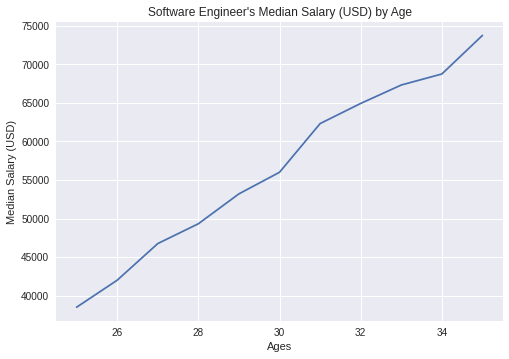

In [146]:
from matplotlib import pyplot as plt
# first we have to populate the coordinates of X and Y
ages_x = [25,26,27,28,29,30,31,32,33,34,35]
dev_y = [38496,42000,46752,49320,53200,56000,62316,64928,67317,68748,73752]

# Then simply plot X and Y coordinates
plt.plot(ages_x, dev_y)

# finally the graph can be named meaningfully.
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Software Engineer\'s Median Salary (USD) by Age')

plt.show()

So, It's obvious,
*   Line graphs can give a quick analysis of data. You're able to quickly tell the range, minimum/maximum, as well as if there are any gaps or clusters. This also means that it can easily observe changes over a certain period of time. When drawing them, you're able to use exact values from your data

Okay, Let's dig in bit more and see how Python helps to do a comparison using line graph.



###(02) Comparing multiple 2D Graphs 

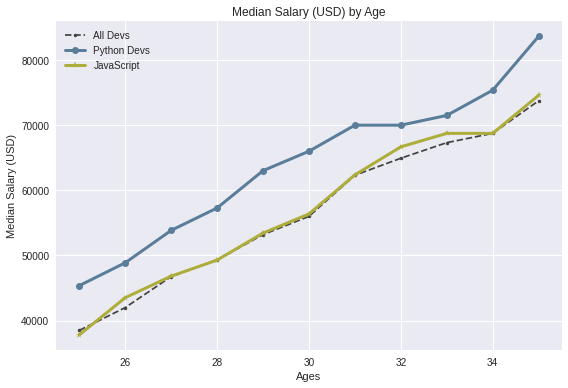

In [25]:
from matplotlib import pyplot as plt
#print(plt.style.available) 
plt.style.use('seaborn')

ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
dev_y = [38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752]

plt.plot(ages_x, dev_y, color='#444444', linestyle='--',marker='.', label="All Devs")

py_dev_y = [45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640]

plt.plot(ages_x, py_dev_y, color='#5a7d9a', marker='o', linewidth=3, label='Python Devs')

js_dev_y = [37810, 43515, 46823, 49293, 53437, 56373, 62375, 66674, 68745, 68746, 74583]

plt.plot(ages_x, js_dev_y, color='#adad3b', marker='*', linewidth=3, label='JavaScript')

plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) by Age')

plt.legend(['All Devs', 'Python Devs','JavaScript'])

plt.grid(True)

plt.tight_layout() 

plt.savefig('plot.png')

plt.show()

### *Let's use this knowledge about 2D graph to analize a seperate problem. For example let's take Olympic Games happens in year 2016 and 2000.*

In this example we will consider the number of athletes participated from different countries in the year 2016 and 2000 Olympics.

---



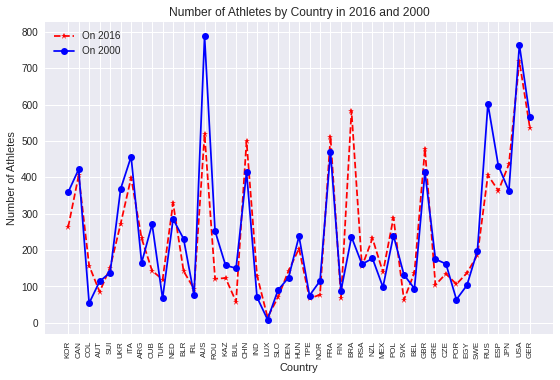

In [157]:
from matplotlib import pyplot as plt 
plt.style.use('seaborn') 

athlete_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/athlete_events.csv')
x = athlete_data.NOC.value_counts().index[0:50]
top_10_data_by_country = athlete_data[athlete_data.NOC.isin(x)]

is_2016 =  top_10_data_by_country['Year']==2016
is_2000 =  top_10_data_by_country['Year']==2000

x_2016=top_10_data_by_country[is_2016].NOC.value_counts(sort=False).index[0:50]
y_2016=top_10_data_by_country[is_2016].NOC.value_counts(sort=False).values[0:50]
x_2000=top_10_data_by_country[is_2000].NOC.value_counts(sort=False).index[0:50]
y_2000=top_10_data_by_country[is_2000].NOC.value_counts(sort=False).values[0:50]

plt.plot(x_2016, y_2016, color='#ff0000', linestyle='--',marker='*', label="No Athletes 2016")
plt.plot(x_2000, y_2000, color='#0000ff', marker='o', label='No Athletes 1936')

plt.xlabel('Country')
plt.ylabel('Number of Athletes')
plt.title('Number of Athletes by Country in 2016 and 2000')

plt.legend(['On 2016', 'On 2000'])
plt.xticks(rotation='vertical',size=8)
plt.grid(True)
plt.tight_layout() 
plt.savefig('plot comparison of Olympics 2016 vs 2000.png')

plt.show()

##So what are its disadvantages? Well, line graphs are generally good only when you have few data values. It also requires that the range in your data not be too big. You may have noticed that the line graph isn't as visually appealing in this example. So, Let's try to solve this problem by using some other form of graph for this data visualization example.

#Bar Charts and Analyzing Data from CSVs

##(01) Create Bar Chart

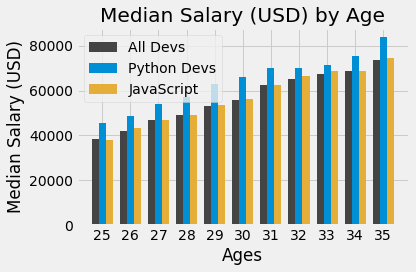

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

plt.style.use("seaborn")

ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

x_indexes = np.arange(len(ages_x))
width = 0.25

dev_y = [38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752]

plt.bar(x_indexes - width, dev_y, width=width, color='#444444', label="All Devs")

py_dev_y = [45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640]

plt.bar(x_indexes, py_dev_y, width=width, color='#008fd5', label='Python Devs')

js_dev_y = [37810, 43515, 46823, 49293, 53437, 56373, 62375, 66674, 68745, 68746, 74583]

plt.bar(x_indexes + width, js_dev_y, width=width, color='#e5ae38',  label='JavaScript')

plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) by Age')

plt.legend()

plt.xticks(ticks=x_indexes, labels=ages_x)

plt.tight_layout() 

plt.show()

##(02) Contd...

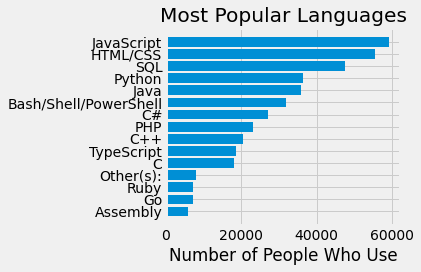

In [ ]:
import csv
import numpy as np
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt

plt.style.use("seaborn")

data = pd.read_csv('/content/sample_data/data.csv')
ids = data['Responder_id']
lang_responses = data['LanguagesWorkedWith']

language_counter = Counter()

for response in lang_responses:
    language_counter.update(response.split(';'))

languages = []
popularity = []

for item in language_counter.most_common(15):
    languages.append(item[0])
    popularity.append(item[1])

languages.reverse()
popularity.reverse()

plt.barh(languages, popularity)

plt.title("Most Popular Languages")
# plt.ylabel("Programming Languages")
plt.xlabel("Number of People Who Use")

plt.tight_layout()

plt.show()

#Pie Chart

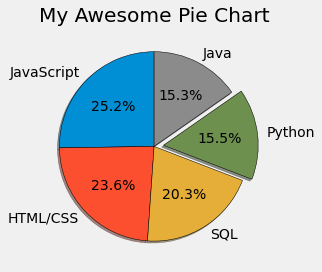

In [ ]:
from matplotlib import pyplot as plt

plt.style.use("seaborn")

slices = [59219, 55466, 47544, 36443, 35917]
labels = ['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java']
explode = [0, 0, 0, 0.1, 0]

plt.pie(slices, labels=labels, explode=explode, shadow=True,
        startangle=90, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("My Awesome Pie Chart")
plt.tight_layout()
plt.show()


#Stack Plots

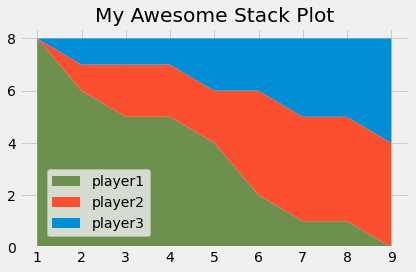

In [ ]:
from matplotlib import pyplot as plt

plt.style.use("seaborn")


minutes = [1, 2, 3, 4, 5, 6, 7, 8, 9]

player1 = [8, 6, 5, 5, 4, 2, 1, 1, 0]
player2 = [0, 1, 2, 2, 2, 4, 4, 4, 4]
player3 = [0, 1, 1, 1, 2, 2, 3, 3, 4]

labels = ['player1', 'player2', 'player3']
colors = ['#6d904f', '#fc4f30', '#008fd5']

plt.stackplot(minutes, player1, player2, player3, labels=labels, colors=colors)

plt.legend(loc=(0.07, 0.05))

plt.title("My Awesome Stack Plot")
plt.tight_layout()
plt.show()

# Colors:
# Blue = #008fd5
# Red = #fc4f30
# Yellow = #e5ae37
# Green = #6d904f

#Filling Area on Line Plots

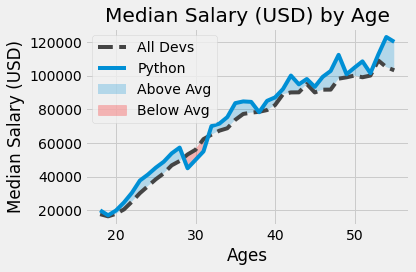

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt


data = pd.read_csv('/content/sample_data/datafill.csv')
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']

plt.plot(ages, dev_salaries, color='#444444',
         linestyle='--', label='All Devs')

plt.plot(ages, py_salaries, label='Python')

overall_median = 57287

plt.fill_between(ages, py_salaries, dev_salaries,
                 where=(py_salaries > dev_salaries),
                 interpolate=True, alpha=0.25, label='Above Avg')

plt.fill_between(ages, py_salaries, dev_salaries,
                 where=(py_salaries <= dev_salaries),
                 interpolate=True, color='red', alpha=0.25, label='Below Avg')

plt.legend()

plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')

plt.tight_layout()

plt.show()

#Histograms


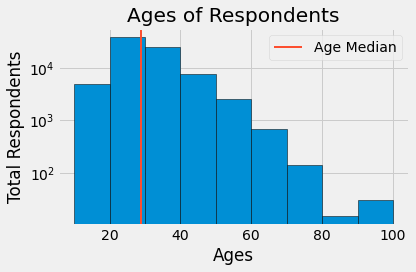

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('seaborn')

data = pd.read_csv('/content/sample_data/dataHisto.csv')
ids = data['Responder_id']
ages = data['Age']

bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

plt.hist(ages, bins=bins, edgecolor='black', log=True)

median_age = 29
color = '#fc4f30'

plt.axvline(median_age, color=color, label='Age Median', linewidth=2)

plt.legend()

plt.title('Ages of Respondents')
plt.xlabel('Ages')
plt.ylabel('Total Respondents')

plt.tight_layout()

plt.show()

#Scatter Plots

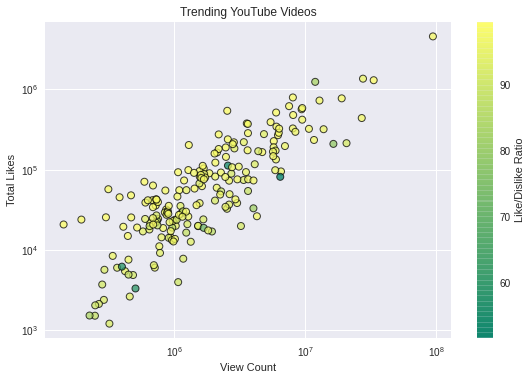

In [ ]:

import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('seaborn')

data = pd.read_csv('/content/sample_data/dataScatter.csv')
view_count = data['view_count']
likes = data['likes']
ratio = data['ratio']

plt.scatter(view_count, likes, c=ratio, cmap='summer',
            edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('Like/Dislike Ratio')

plt.xscale('log')
plt.yscale('log')

plt.title('Trending YouTube Videos')
plt.xlabel('View Count')
plt.ylabel('Total Likes')

plt.tight_layout()

plt.show()

#Plotting Time Series Data

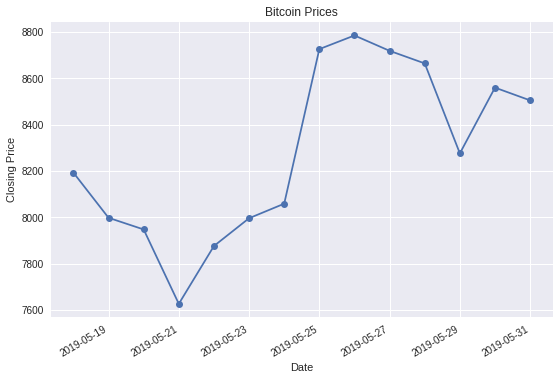

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

plt.style.use('seaborn')

data = pd.read_csv('/content/sample_data/dataPlotting.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)

price_date = data['Date']
price_close = data['Close']

plt.plot_date(price_date, price_close, linestyle='solid')

plt.gcf().autofmt_xdate()

plt.title('Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')

plt.tight_layout()

plt.show()

#Plotting Live Data in Real-Time

In [ ]:

import random
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

plt.style.use('seaborn')

x_vals = []
y_vals = []

index = count()


def animate(i):
    data = pd.read_csv('data.csv')
    x = data['x_value']
    y1 = data['total_1']
    y2 = data['total_2']

    plt.cla()

    plt.plot(x, y1, label='Channel 1')
    plt.plot(x, y2, label='Channel 2')

    plt.legend(loc='upper left')
    plt.tight_layout()


ani = FuncAnimation(plt.gcf(), animate, interval=1000)

plt.tight_layout()
plt.show()

<Figure size 576x396 with 0 Axes>

In [ ]:

import csv
import random
import time

x_value = 0
total_1 = 1000
total_2 = 1000

fieldnames = ["x_value", "total_1", "total_2"]


with open('data.csv', 'w') as csv_file:
    csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    csv_writer.writeheader()

while True:

    with open('data.csv', 'a') as csv_file:
        csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

        info = {
            "x_value": x_value,
            "total_1": total_1,
            "total_2": total_2
        }

        csv_writer.writerow(info)
        print(x_value, total_1, total_2)

        x_value += 1
        total_1 = total_1 + random.randint(-6, 8)
        total_2 = total_2 + random.randint(-5, 6)

    time.sleep(1)

0 1000 1000
1 1005 1004
2 1010 1007
3 1015 1003
4 1020 1001
5 1016 1004
6 1023 1006
7 1018 1009
8 1013 1005
9 1014 1008
10 1017 1003
11 1018 1007
12 1018 1008
13 1024 1011
14 1018 1014
15 1025 1010
16 1031 1013
17 1036 1010
18 1037 1009
19 1035 1013
20 1033 1008
21 1032 1008
22 1033 1012
23 1039 1014
24 1034 1014
25 1028 1019
26 1022 1022
27 1018 1022
28 1023 1017
29 1020 1015
30 1024 1015
31 1020 1012
32 1025 1009
33 1033 1014
34 1036 1010
35 1035 1016
36 1035 1012


KeyboardInterrupt: ignored

#SubPlots

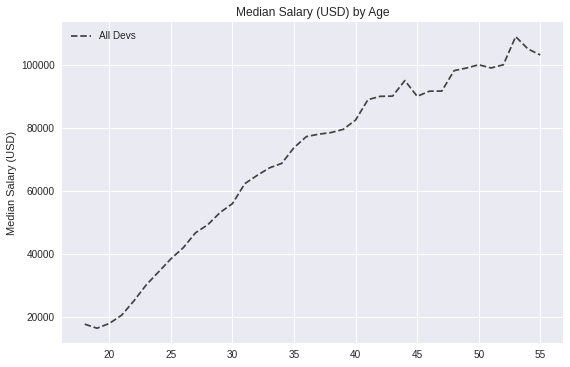

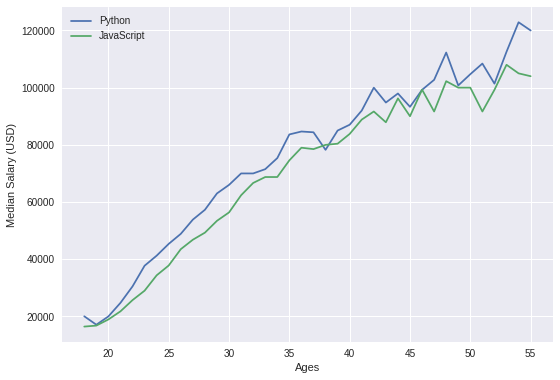

In [ ]:

import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('seaborn')

data = pd.read_csv('/content/sample_data/dataSubPlot.csv')
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

ax1.plot(ages, dev_salaries, color='#444444',
         linestyle='--', label='All Devs')

ax2.plot(ages, py_salaries, label='Python')
ax2.plot(ages, js_salaries, label='JavaScript')

ax1.legend()
ax1.set_title('Median Salary (USD) by Age')
ax1.set_ylabel('Median Salary (USD)')

ax2.legend()
ax2.set_xlabel('Ages')
ax2.set_ylabel('Median Salary (USD)')

plt.tight_layout()

plt.show()

fig1.savefig('fig1.png')
fig2.savefig('fig2.png')